The aim of this EDA is to get an idea about how the delays are distributed among the different seasons of the year (do we have more delays in summer/winter?) and if the delays cluster at a certain time of the day. 

- DATOP - Date of flight
- FLTID - Flight number
- DEPSTN - Departure point
- ARRSTN - Arrival point
- STD - Scheduled Time departure
- STA - Scheduled Time arrival
- STATUS - Flight status
- ETD - Expected Time departure
- ETA - Expected Time arrival
- ATD - Actual Time of Departure
- ATA - Actual Time of arrival
- DELAY1 - Delay code 1
- DUR1 - delay time 1
- DELAY2 - Delay code 2
- DUR2 - delay time 2
- DELAY3 - Delay code 3
- DUR3 - delay time 3
- DELAY4 - Delay code 4
- DUR4 - delay time 4
- AC - Aircraft Code
- DEP - Departed 
- RTR - Receiver Transmitter 
- SCH - Schedule 
- DEL - Deliver (?)

In [1]:
#import all required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from numpy import mean




In [2]:
# Import the training data set 
df = pd.read_csv('data/train.csv')

In [3]:
#Investigate the data set 
df.head(5)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
df.shape

(107833, 10)

In [5]:
df.DEPSTN.nunique()

132

In [6]:
df.ARRSTN.nunique()

128

In [7]:
#Find out in which time periods the data has been collected 
df.STD.sort_values()

#So the time period is from 01.01.2016 to 31.12.2018 

15674     2016-01-01 00:15:00
15676     2016-01-01 00:55:00
15675     2016-01-01 01:20:00
30980     2016-01-01 06:15:00
7179      2016-01-01 06:30:00
                 ...         
103836    2018-12-31 22:00:00
107776    2018-12-31 22:00:00
103139    2018-12-31 22:20:00
103138    2018-12-31 22:40:00
99851     2018-12-31 23:10:00
Name: STD, Length: 107833, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [9]:
df.FLTID.nunique()

1861

In [10]:
df.AC.nunique()

68

In [11]:
#Try to understand what the flight status stands for
df.groupby('STATUS').nunique()

#Grouping it by status and checking for unique values does not really clarify what exactly every status means and if it is important 

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,AC,target
STATUS,,,,,,,,,
ATA,93679,1011,1782,129,125,73283,76274,61,964
DEL,151,78,38,17,14,151,150,5,1
DEP,467,310,33,9,16,467,467,5,74
RTR,294,253,135,38,38,289,289,33,100
SCH,13242,1011,132,59,59,11491,11724,41,1


In [12]:
print(df.target.min())
print(df.target.max())

0.0
3451.0


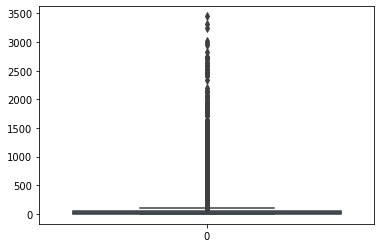

In [13]:
#Boxplot to analyze the distribution of the target column 
df.query('target == 0')
sns.boxplot(data=df.target);

In [14]:
df.query('target == 0').target.count()

#we have many flights that arrived in time. These ones we do not consider as delayed
percentage_in_time = (38168/107833)*100
print(percentage_in_time)

35.39547262897258


In [15]:
# changing times into Time format
df['DATOP'] = pd.to_datetime(df['DATOP'])
df['STD'] = pd.to_datetime(df['STD'])
df['STA'] = df['STA'].str.replace('.', ':')
df['STA'] = pd.to_datetime(df['STA'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      107833 non-null  object        
 1   DATOP   107833 non-null  datetime64[ns]
 2   FLTID   107833 non-null  object        
 3   DEPSTN  107833 non-null  object        
 4   ARRSTN  107833 non-null  object        
 5   STD     107833 non-null  datetime64[ns]
 6   STA     107833 non-null  datetime64[ns]
 7   STATUS  107833 non-null  object        
 8   AC      107833 non-null  object        
 9   target  107833 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 8.2+ MB


/var/folders/v3/9m4l768x37nbr7_d_v6t2fhm0000gn/T/ipykernel_65110/3768464511.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['STA'] = df['STA'].str.replace('.', ':')


In [16]:
# Plot1: see how big the delay at different time points of the year is
# Create a new columns containing year and month of the flight (from DATOP)

df['DATOP_year'] = df.DATOP.dt.year
df['DATOP_month'] = df.DATOP.dt.month
df.head(2)


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,DATOP_year,DATOP_month
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1


In [17]:
#Want to have a plot where we see the number of flights per month and year 
df_id = df.groupby(['DATOP_month', 'DATOP_year']).FLTID.count().reset_index()
#df_id_pivot = df_id.pivot('DATOP_month', 'DATOP_year', 'FLTID')
#df_id_pivot


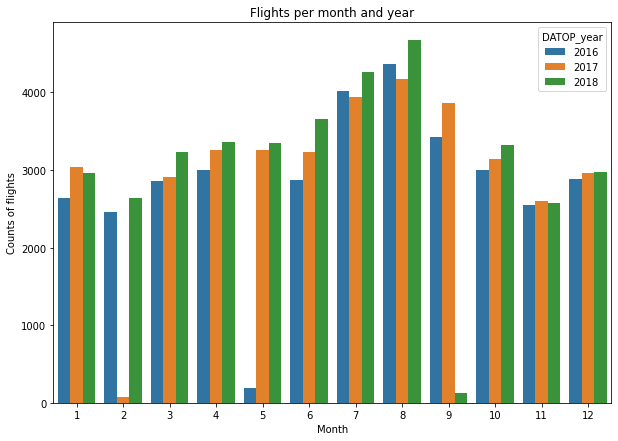

In [27]:
#Plot counts of flight per Month and year 
plt.figure(figsize=(10,7))
sns.barplot(data=df_id, x='DATOP_month', y='FLTID', hue='DATOP_year').set(title='Flights per month and year', xlabel='Month', ylabel='Counts of flights');

DATOP_year        2016       2017       2018
DATOP_month                                 
1            38.509848  39.524154  32.137301
2            16.774246  14.866667  27.171602
3            33.430269  47.997934  67.965934
4            19.324550  73.073268  60.236537
5            26.957895  54.015683  57.793660
6            18.912726  43.863327  63.332512
7            45.777750  70.393663  57.440769
8            41.590483  59.224622  89.365525
9            45.608987  74.168999  45.492424
10           29.295864  30.588628  46.659337
11           17.229502  37.825702  46.589216
12           42.761246  45.753124  69.996298


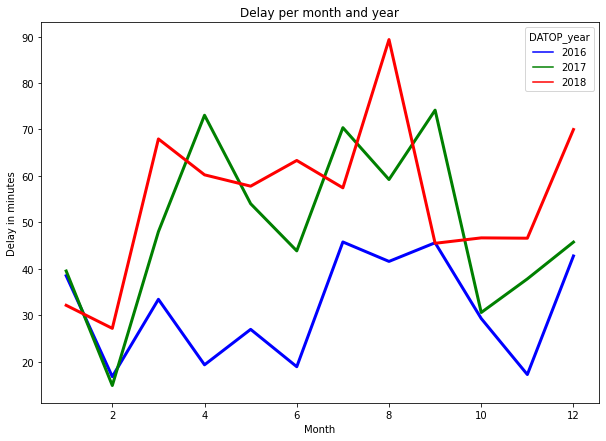

In [19]:
#For the visualization group the dates of flight per year and month (create 3 subplots, one for each year)
#create pivot table
df_months = df.groupby(['DATOP_month', 'DATOP_year']).mean().reset_index()
df_months
df_months_pivot= df_months.pivot('DATOP_month', 'DATOP_year', 'target')
print(df_months_pivot)
plt.figure(figsize=(10,7))
sns.lineplot(data=df_months_pivot, linewidth=3, palette=['b', 'g', 'r'],dashes=False).set(title='Delay per month and year', xlabel='Month', ylabel='Delay in minutes');


In [20]:
# For the next plot we are interested in how the delay is distributed over the day 
#create a new column containing the time of depature

df['STD_time'] = df.STD.dt.time
df.head(2)



,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,DATOP_year,DATOP_month,STD_time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,10:30:00
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,15:05:00


In [21]:
df_time = df[['STD_time', 'target']].groupby('STD_time').mean().round().reset_index()
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STD_time  526 non-null    object 
 1   target    526 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.3+ KB


In [22]:
#Convert STD_time column to timedelta 
time = pd.to_timedelta(pd.to_datetime(df['STD']).dt.time.astype(str))
time

0        0 days 10:30:00
1        0 days 15:05:00
2        0 days 04:10:00
3        0 days 14:10:00
4        0 days 14:30:00
               ...      
107828   0 days 23:00:00
107829   0 days 08:00:00
107830   0 days 05:00:00
107831   0 days 18:00:00
107832   0 days 06:15:00
Name: STD, Length: 107833, dtype: timedelta64[ns]

In [28]:
#create new categories in such a way that early flights are considered as departing between midnight and 10 am and everything afterwards as late 
# # define bins and labels
bins = ['00:00:00', '06:00:00', '11:00:00', '17:00:00', '23:59:59']
labels = ['Early_Morning', 'Morning', 'Mid-Day', 'Late']

#convert to timedelta 
categories = pd.cut(time, bins=pd.to_timedelta(bins), labels=labels, ordered=False)
categories

0               Morning
1               Mid-Day
2         Early_Morning
3               Mid-Day
4               Mid-Day
              ...      
107828             Late
107829          Morning
107830    Early_Morning
107831             Late
107832          Morning
Name: STD, Length: 107833, dtype: category
Categories (4, object): ['Early_Morning', 'Morning', 'Mid-Day', 'Late']

In [32]:
df['STD_time_category'] = categories
df.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,DATOP_year,DATOP_month,STD_time,STD_time_category
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,10:30:00,Morning
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,15:05:00,Mid-Day


In [30]:
#Check the number of flights for the two categories, normalize to the number of flights 
df.STD_time_category

0               Morning
1               Mid-Day
2         Early_Morning
3               Mid-Day
4               Mid-Day
              ...      
107828             Late
107829          Morning
107830    Early_Morning
107831             Late
107832          Morning
Name: STD_time_category, Length: 107833, dtype: category
Categories (4, object): ['Early_Morning', 'Morning', 'Mid-Day', 'Late']

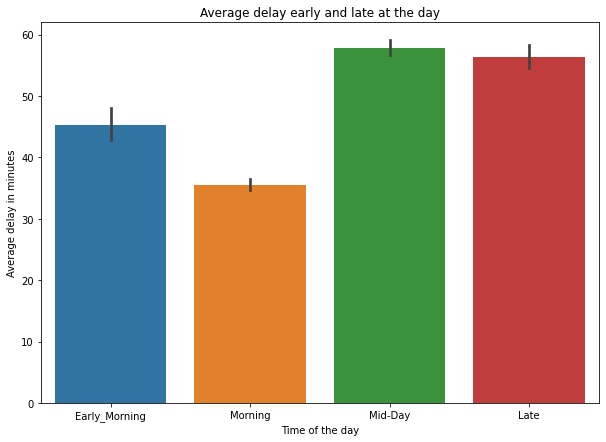

In [31]:
#Create a plot showing the average delay (or if 0 without delay) for early and late flights 
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='STD_time_category', y='target', estimator=mean).set(title='Average delay early and late at the day', xlabel='Time of the day', ylabel='Average delay in minutes');

In [67]:
#Want to normalize our data for the weight of the flight number (=number of flights per category/ total number of flights)
df2 = df.groupby('STD_time_category').FLTID.count().reset_index()
print(df2)

df3 = df.groupby('STD_time_category').target.mean().reset_index()
print(df3)

#what is the total number of flights? 
print(df2.FLTID.sum())

#calculate the weight per category 
early = 9396/107678
morning = 37024/107678
mid = 39442/107678
late = 21816/107678

#built a new list with the four weights 
weight =[early, morning, mid, late]
print(weight)

#add the list as new column to our df3 dataframe
df3['weight']= weight
df3

#create a new column for the normalization 
df3 = df3.eval('normalized = target * weight')


  STD_time_category  FLTID
0     Early_Morning   9396
1           Morning  37024
2           Mid-Day  39442
3              Late  21816
  STD_time_category     target
0     Early_Morning  45.316092
1           Morning  35.555153
2           Mid-Day  57.834643
3              Late  56.418133
107678
[0.08726016456472074, 0.3438399673099426, 0.36629580787161725, 0.2026040602537194]


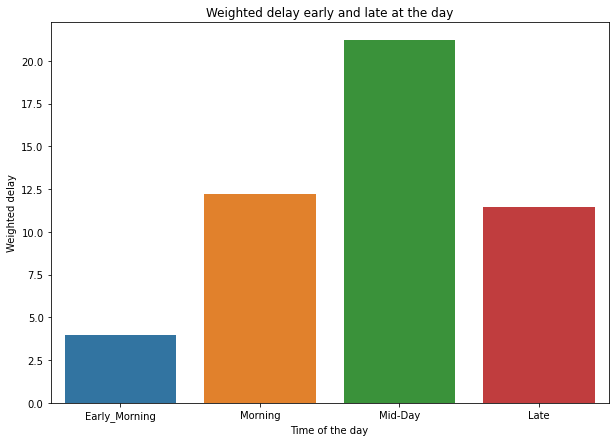

In [68]:
#Create a plot with the normalized data 
plt.figure(figsize=(10,7))
sns.barplot(data=df3, x='STD_time_category', y='normalized').set(title='Weighted delay early and late at the day', xlabel='Time of the day', ylabel='Weighted delay');